In [60]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns
# import scipy

In [61]:
file_path = 'Usability_study_data.csv'
data = pd.read_csv(file_path)

In [62]:
data = data.drop(['Timestamp', 'Email Address'], axis=1)

In [63]:
keys = data.columns.tolist()

In [64]:
questions = {}

for key in keys:
    question = (key[:key.find("[")].strip())
    framework = key[key.find("["):].strip()
    if framework in ['[DSPy]','[LMQL]','[MTLLM]']:
        if question != 'Would you recommend this framework to others?':
            if question not in questions.keys():
                questions[question] = pd.DataFrame()
            questions[question][framework] = (((data.map(lambda x: x[0] if isinstance(x, str) else x))[key]).astype(int))

In [65]:
questions

{'How easy was it to set up and start using the framework?':     [DSPy]  [LMQL]  [MTLLM]
 0        1       1        5
 1        3       4        2
 2        2       2        3
 3        3       1        3
 4        4       1        5
 5        4       2        5
 6        1       1        1
 7        3       1        4
 8        3       2        4
 9        3       1        4
 10       3       1        3
 11       4       2        4
 12       3       1        3
 13       4       3        2
 14       4       2        3
 15       4       1        3
 16       3       3        2
 17       4       1        4
 18       1       1        3
 19       2       3        4,
 'How intuitive do you find the syntax and structure of the framework?':     [DSPy]  [LMQL]  [MTLLM]
 0        3       4        5
 1        3       4        4
 2        4       4        4
 3        2       3        4
 4        3       1        4
 5        4       3        4
 6        4       4        4
 7        3       1       

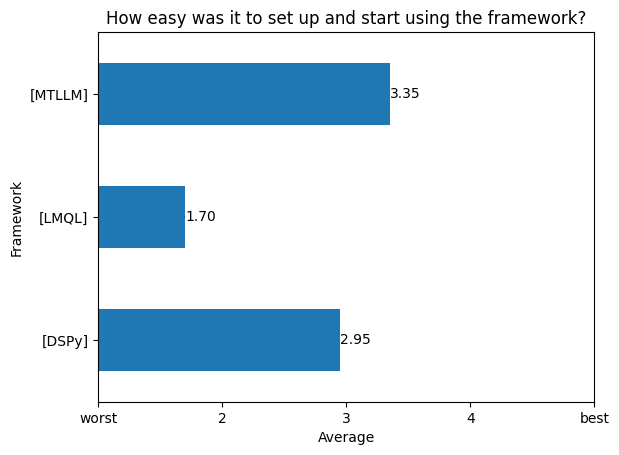

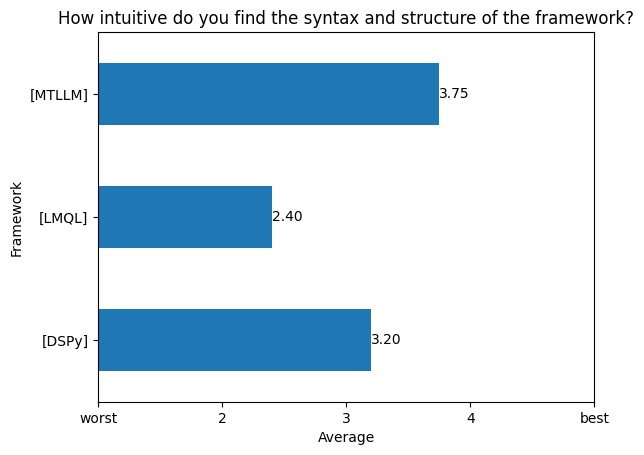

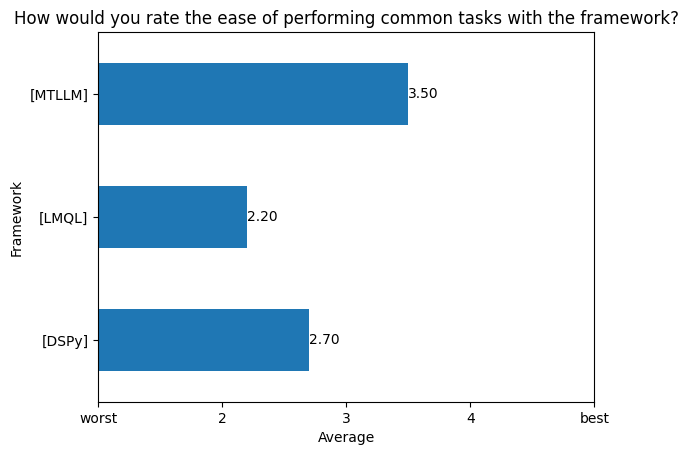

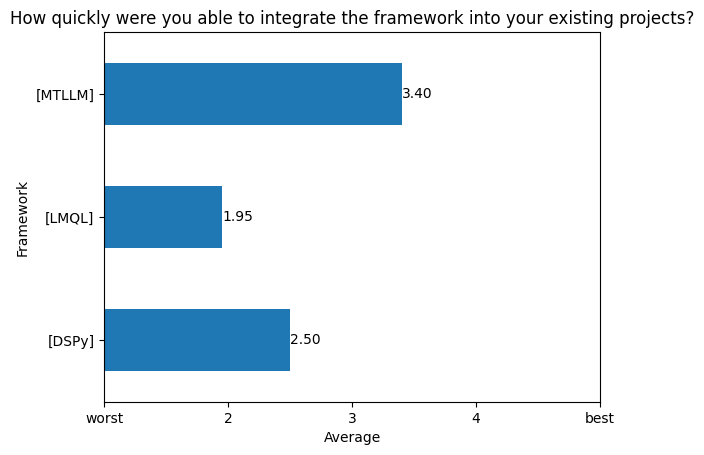

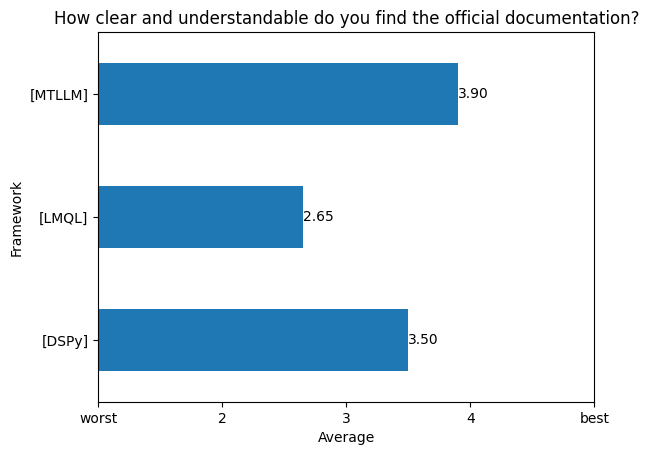

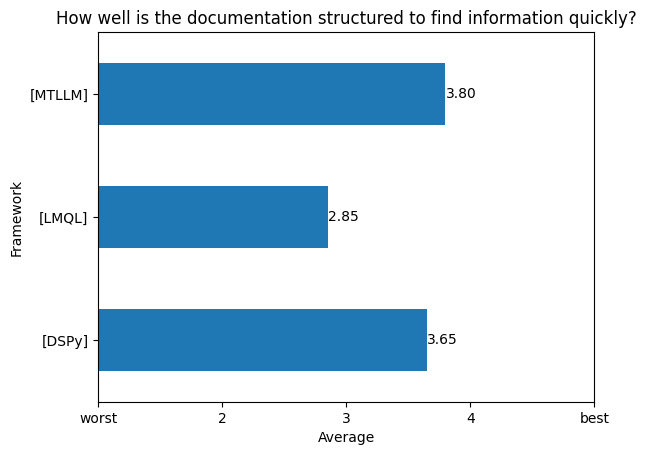

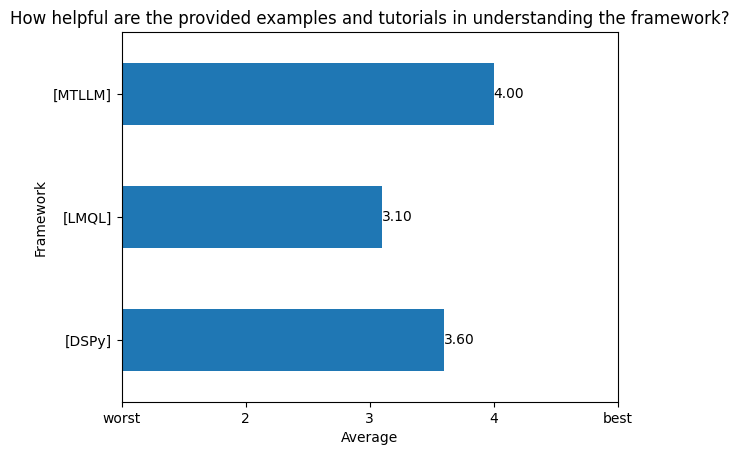

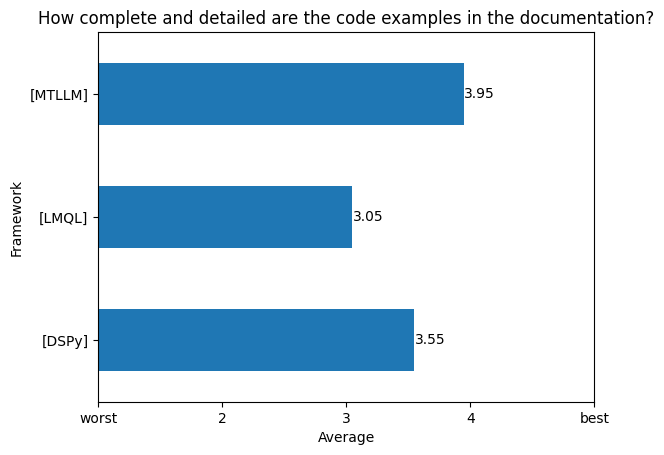

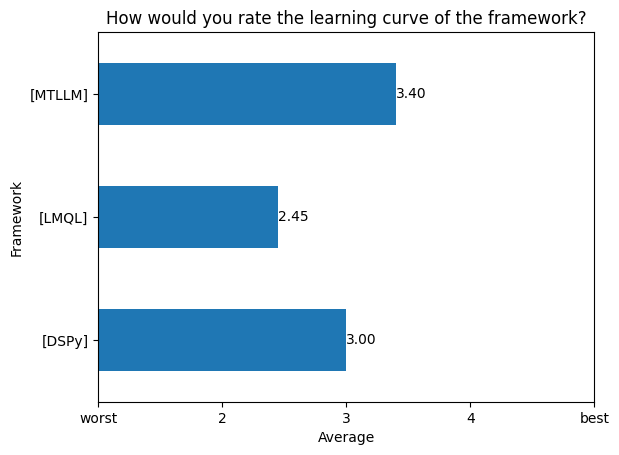

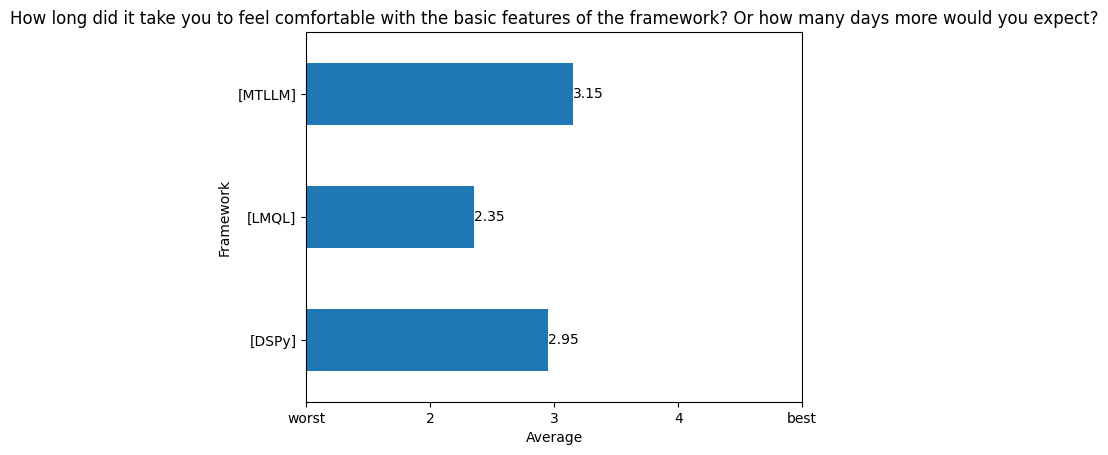

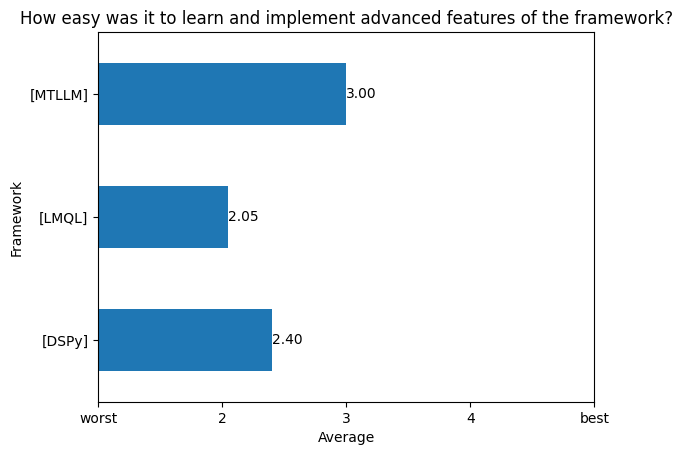

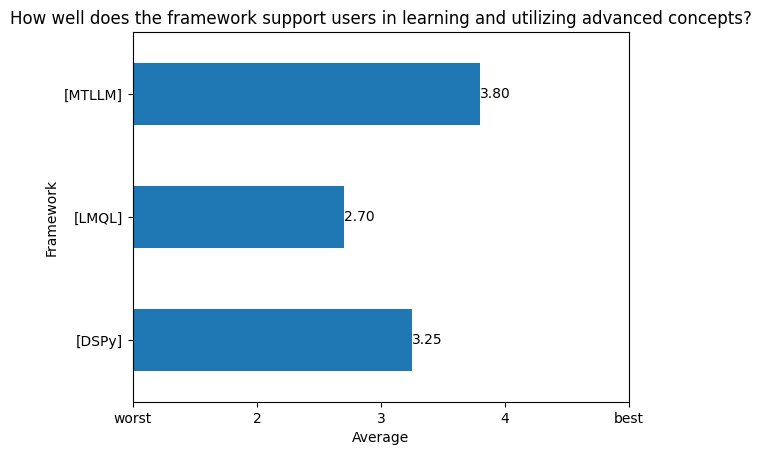

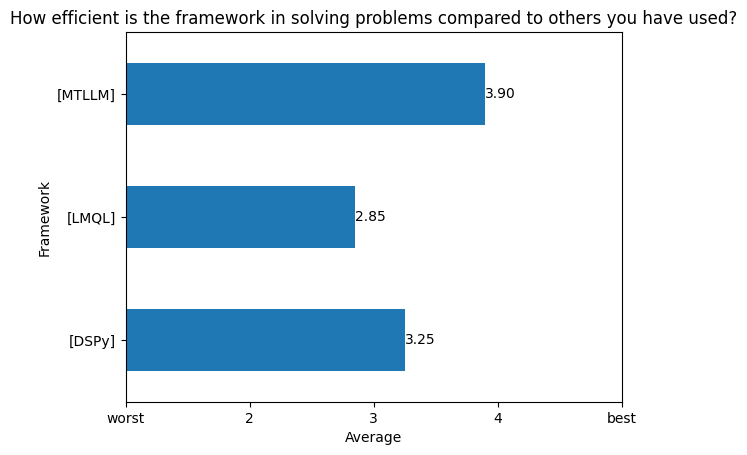

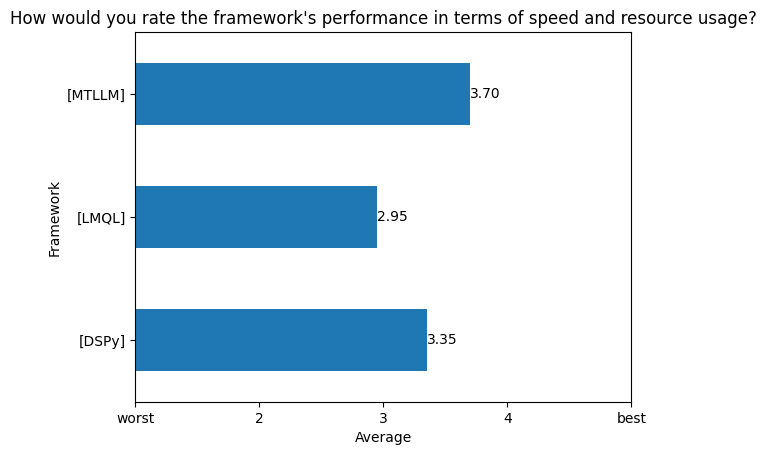

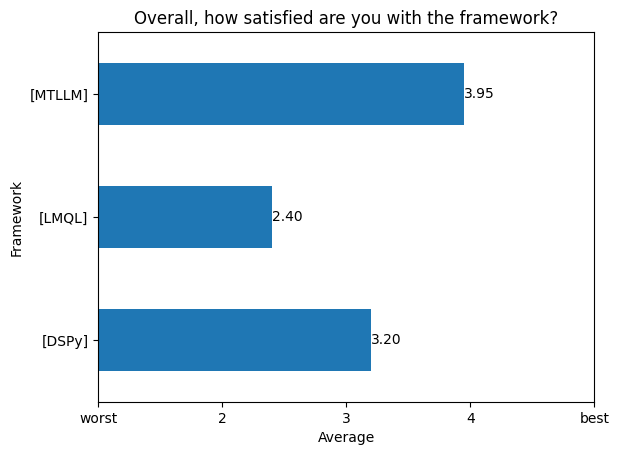

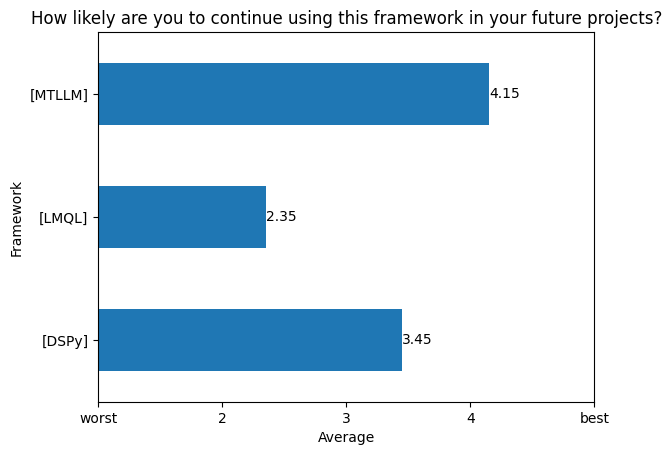

In [66]:
import matplotlib.pyplot as plt

for question, df in questions.items():
    means = df.mean()
    means.plot(kind='barh')
    plt.title(question)
    plt.xlabel('Average')
    plt.ylabel('Framework')
    plt.xlim(1, 5)
    plt.xticks([1, 2, 3, 4, 5], ['worst', 2, 3, 4, 'best'])
    for index, value in enumerate(means):
        plt.text(value, index, f'{value:.2f}', va='center')
    plt.show()